# study ev data

## thoughts about the data

### The most is Model, can these models be combined or not?
- the Answer is no: because with the same model, the creat year may be different, which means the battery or other performance of the car is also different. So, I will drop the model col and more forcus on the time and vehicle classes

### kW vs. kWh (Important Distinction) (from gemini)
- It is easy to confuse kW with kWh (kilowatt-hour) when looking at electric vehicles: 
  - kW (Power): Measures the motor's instantaneous strength (like the size of a water hose's flow).
  - kWh (Energy): Measures the battery capacity or "tank size" (like the total amount of water in a bucket). 


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

size_mapping = {
    'Two-seater': 1,
    'Minicompact': 2,
    'Subcompact': 3,
    'Compact': 4,
    'Station wagon: Small': 5,
    'Sport utility vehicle: Small': 6,
    'Mid-size': 7,
    'Station wagon: Mid-size': 8,
    'Full-size': 9,
    'Sport utility vehicle: Standard': 10,
    'Minivan': 11,
    'Pickup truck: Standard': 12
}

def df_country_map(df:pd.DataFrame, map_csv_fl:str='data/ev_data_model_country.csv')->pd.DataFrame:
    '''
    Docstring for df_country_map
        this is to map the make vs its original country
    '''
    mdf = pd.read_csv(map_csv_fl)
    make, country = 'Make', 'Country'
    
    rel_df = mdf[[make, country]].copy()
    rel_df.drop_duplicates(inplace=True)
    rel_df.reset_index(drop = True, inplace=True)
    
    df_new = pd.merge(df, rel_df, how = 'left', left_on='Make', right_on='Make')
    return df_new

## check with num data 

### checked with the year vs recharge_time. 
- no strong relationship
```
year = 'Model year'
rech_t = 'Recharge time (h)'
plt.scatter(x = df[year], y = df[rech_t], alpha = .3)
```
### checked with spd vs recharge_time
- some relationship. may also need to add year into there, to check if some higher spd with the higher recharging time. 
- After adding year element, with time goes, the recharging time longer
```
spd = 'spd_km/h' # the max spd to run with the motor
df[spd] = df[energy_eff]*df[m_kw]    
plt.scatter(x = df[spd], y = df[rech_t], alpha = .3, c = df[year], cmap = 'viridis')
```

### check with 

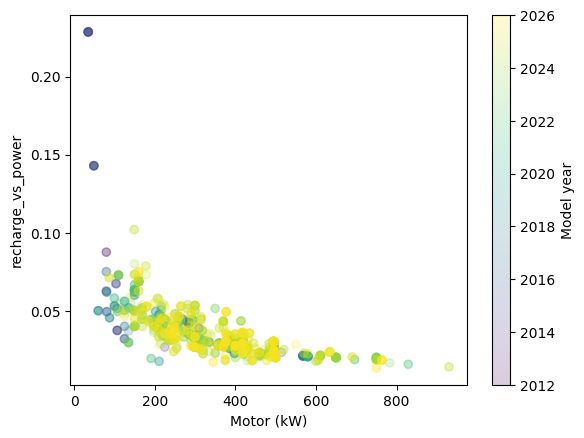

In [3]:


fl_name = '../../data/ev_data.csv'
df = pd.read_csv(fl_name)
year = 'Model year'
m_kw = 'Motor (kW)' # the power of the motor
rech_t = 'Recharge time (h)'
energy_eff = 'Energy Efficiency (km/kWh)' # with every unit of battery capacity, how much km can run. this is to check battery turn out efficiency, 
spd = 'spd_km/h' # the max spd to run with the motor
df[spd] = df[energy_eff]*df[m_kw]
rech_vs_power = 'recharge_vs_power' # the battery capacity should match to the power, so this parameter is to link the battery with the motor power
df[rech_vs_power] = df[rech_t]/df[m_kw]

plt.scatter(x = df[m_kw], y = df[rech_vs_power], c = df[year], cmap = 'viridis', alpha = .2) # , c = df[year], cmap = 'viridis'
plt.xlabel(f'{m_kw}')
plt.ylabel(f'{rech_vs_power}')
plt.colorbar(label=year)
plt.show()

## check country vs the vehicle classes

- base with the below, seems the Germany/ Japan focus more in the small size vehicle, while the USA/ UK, focus more with the large size of the vehicles

- need to split USA/ UK and JP / Germany

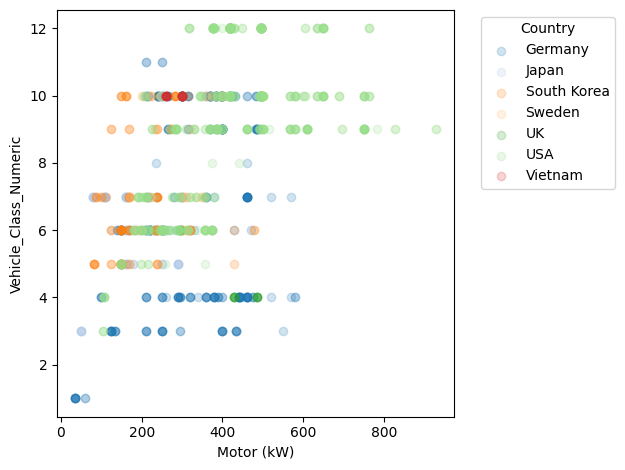

In [ ]:

def about_num_data(fl_name:str):
    df = pd.read_csv(fl_name)
    df = df_country_map(df)
    
    # Apply to your dataframe, this is to transfer the vehicle class into some meaningful number/ encoding it. 
    df['Vehicle_Class_Numeric'] = df['Vehicle class'].map(size_mapping)
    v_class_num = 'Vehicle_Class_Numeric'
    country = 'Country'

    year = 'Model year'
    m_kw = 'Motor (kW)' # the power of the motor
    rech_t = 'Recharge time (h)'
    energy_eff = 'Energy Efficiency (km/kWh)' # with every unit of battery capacity, how much km can run. this is to check battery turn out efficiency, 
    spd = 'spd_km/h' # the max spd to run with the motor
    v_class = 'Vehicle class'
    df[spd] = df[energy_eff]*df[m_kw]
    rech_vs_power = 'recharge_vs_power' # the battery capacity should match to the power, so this parameter is to link the battery with the motor power
    df[rech_vs_power] = df[rech_t]/df[m_kw]
    '''
    STOP HERE
    '''
    # check the v_class vs motor power color / label is country
    
    unique_classes = df[country].unique()
    cm = plt.get_cmap('tab20')
    
    for i, (name, group) in enumerate(df.groupby(country)):
        plt.scatter(x=group[m_kw], y=group[v_class_num], alpha=0.2, label=name, color=cm(i % 20))

    plt.xlabel(f'{m_kw}')
    plt.ylabel(f'{v_class_num}')
    plt.legend(title=country, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
about_num_data('../../data/ev_data.csv')    

## check 

In [ ]:
    # check the v_class vs motor power color / label is country
    
    unique_classes = df[country].unique()
    cm = plt.get_cmap('tab20')
    
    for i, (name, group) in enumerate(df.groupby(country)):
        plt.scatter(x=group[m_kw], y=group[v_class_num], alpha=0.2, label=name, color=cm(i % 20))

    plt.xlabel(f'{m_kw}')
    plt.ylabel(f'{v_class_num}')
    plt.legend(title=country, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()